# Neuronales Netz zur Umsatzvorhersage

In diesem Notebook trainieren wir ein einfaches Feedforward-Neuronales Netz (MLP) auf den vorbereiteten Bäckerei-Umsatzdaten.  
Ziel ist es, die Regressionsleistung mit vorherigen Modellen (z. B. Random Forest) zu vergleichen.

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Der vollständige, bereinigte Datensatz wie aus RF-Notebook
df = pd.read_csv("../../data/df_prepared.csv")  # oder baue ihn wie im RF-Notebook auf

# Features und Zielspalte definieren
features = ["Warengruppe", "Temperatur", "Bewoelkung", "Windgeschwindigkeit",
            "KielerWoche", "Wochentag", "Monat", "IstWochenende", "Feiertag", "Ferienzeit"]
target = "Umsatz"

In [11]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [12]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))  # 20% Dropout zur Regularisierung
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Regressionsausgabe

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
model.summary()

/Users/tilonjurgensen/Developer/MachineLearning/ml_codespace_team4_opencampus/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,777 (46.00 KB)

 Trainable params: 11,777 (46.00 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=16,  # kleiner Batch für stabileres Lernen
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/200
534/534 ━━━━━━━━━━━━━━━━━━━━ 1s 667us/step - loss: 31359.9941 - mae: 126.1343 - val_loss: 20490.4707 - val_mae: 115.4587
Epoch 2/200
534/534 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - loss: 23514.9629 - mae: 116.8905 - val_loss: 20496.2227 - val_mae: 118.2413
Epoch 3/200
534/534 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 21932.9531 - mae: 115.7517 - val_loss: 20708.6875 - val_mae: 120.1528
Epoch 4/200
534/534 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 23053.7578 - mae: 117.0746 - val_loss: 20312.4004 - val_mae: 115.5052
Epoch 5/200
534/534 ━━━━━━━━━━━━━━━━━━━━ 0s 554us/step - loss: 22396.2227 - mae: 116.9775 - val_loss: 20276.2031 - val_mae: 113.9870
Epoch 6/200
534/534 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step - loss: 22290.3730 - mae: 114.2575 - val_loss: 20440.2285 - val_mae: 118.3976
Epoch 7/200
534/534 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - loss: 21658.1758 - mae: 116.6678 - val_loss: 20321.7227 - val_mae: 114.0145
Epoch 8/200
534/534 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - loss: 21788.

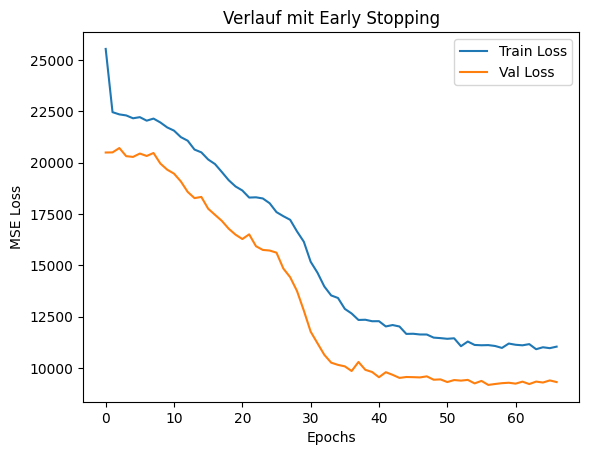

In [14]:
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.title("Verlauf mit Early Stopping")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

In [15]:
y_pred = model.predict(X_test).flatten()

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.3f}")

84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step
RMSE: 96.44
R²: 0.568


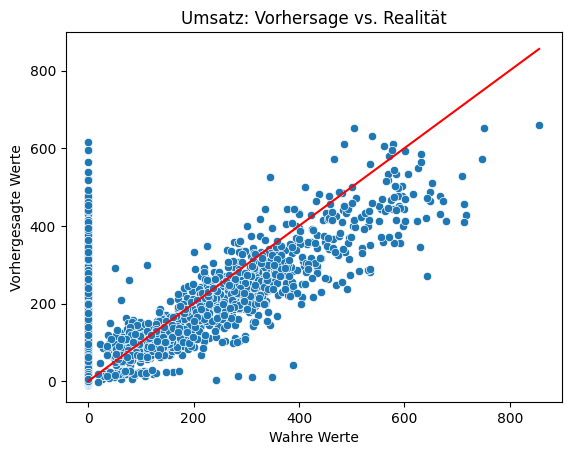

In [16]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Wahre Werte")
plt.ylabel("Vorhergesagte Werte")
plt.title("Umsatz: Vorhersage vs. Realität")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red")
plt.show()